# 情報科学演習２　マルチメディアプログラミング課題

# 課題1　動画の読み込み


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
#1

path = "/content/drive/MyDrive/Colab Notebooks/dataset"
video1 = cv2.VideoCapture(path+"/videos/People - 84973.mp4")

print("Width:", video1.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Height:", video1.get(cv2.CAP_PROP_FRAME_HEIGHT))

fps = video1.get(cv2.CAP_PROP_FPS)
print("FPS:", fps)

frame_num = video1.get(cv2.CAP_PROP_FRAME_COUNT)
print("All Frame:", frame_num)


Width: 1280.0
Height: 720.0
FPS: 25.0
All Frame: 241.0


# 課題２　サムネイル画像の作成

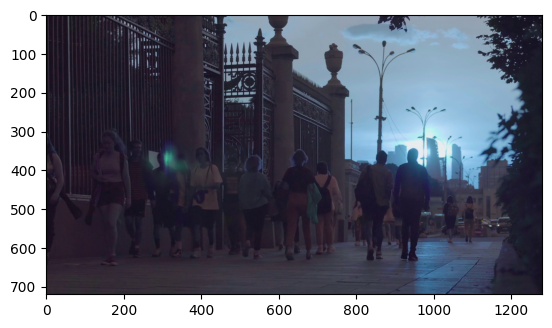

In [2]:
#2

ret, frame = video1.read()
show_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

while True:
  ret, show_frame = video1.read()
  if not ret:
    break
  if int(video1.get(cv2.CAP_PROP_POS_FRAMES)) == 10:
    plt.imshow(show_frame)
    cv2.imwrite(path + "/videos/output/632120_People_thumb.jpg", frame)
    break
video1.release()




# 課題３　ファイル名のパース

In [3]:
#3

file_name = "People - 84973.mp4"
string_list = file_name.split()
Title = string_list[0]
ID= string_list[2].replace('.mp', '')


print("Title:", Title)
print("ID:", ID)

Title: People
ID: 849734


# 課題４　二値化と動画の保存

In [4]:
#4
video2 = cv2.VideoCapture(path + "/videos/Cat - 66004.mp4")
size = (int(video2.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video2.get(cv2.CAP_PROP_FRAME_HEIGHT)))
new_size = (int(size[0]*0.3), int(size[1]*0.3))
new_video = cv2.VideoWriter(path + "/videos/output/6321120_cat_binary.mp4", cv2.VideoWriter_fourcc('M','P','4','V'),int(video2.get(cv2.CAP_PROP_FPS)), new_size)

while True:
  ret, frame = video2.read()
  if not ret:
    break

  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  ret, gray2 = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)
  resize = cv2.resize(gray2, new_size)
  bgr = cv2.cvtColor(resize,cv2.COLOR_GRAY2BGR)
  new_video.write(bgr)

  video2.release()
  new_video.release()



# 課題５　音声の可視化

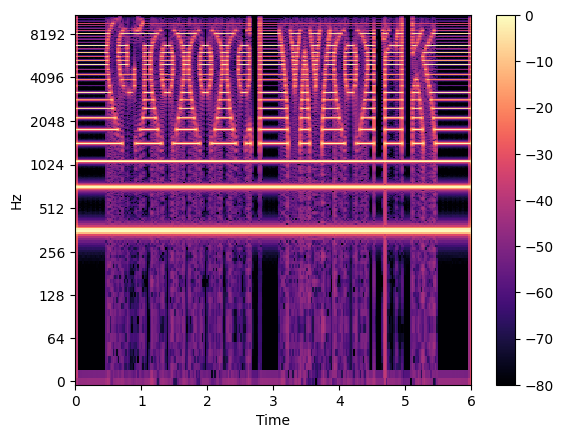

In [5]:
#5
import librosa
import IPython.display
import soundfile as sf

y, sr = librosa.load(path + "/audio/report_audio.wav")



D = librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref = np.max)
librosa.display.specshow(D, y_axis='log', sr=sr,x_axis='time')
plt.colorbar()



# 課題６　動画の変わり目を検出する

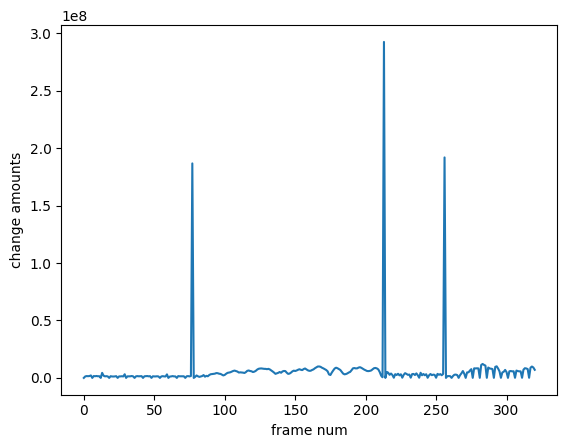

Change frames: [77, 213, 256]


In [13]:
video3 = cv2.VideoCapture(path + "/videos/Detection.mp4")

ret, frame1 = video3.read()
frame1_g = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
change_amounts = []

while True:
  ret, frame2 = video3.read()
  if not ret:
    break

  frame2_g = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

  difference = np.abs(frame1_g.astype(np.int16) - frame2_g.astype(np.int16))

  change_amount = np.sum(difference)
  change_amounts.append(change_amount)

  frame1_g = frame2_g

video3.release()

plt.plot(change_amounts)
plt.xlabel('frame num')
plt.ylabel("change amounts")
plt.show()

threshold = np.mean(change_amounts) * 10

change_frames = [i for i, v in enumerate(change_amounts) if v > threshold]
print('Change frames:', change_frames)


# 課題７　オブジェクト指向：Video クラスの作成

Title: People
ID: 84973
path: /content/drive/MyDrive/Colab Notebooks/dataset/videos/People - 84973.mp4


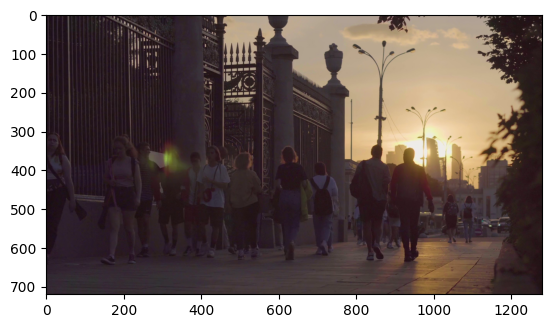

In [18]:
class Video:
  def __init__(self, video_path):
    self.path = video_path
    self.title = None
    self.id = None
    self.thumbnail = None
    self.video4 = cv2.VideoCapture(self.path)
    self.frame_size = (int(self.video4.get(cv2.CAP_PROP_FRAME_WIDTH)), int(self.video4.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    self.new_size = (int(self.frame_size[0]*0.3) , int(self.frame_size[1]*0.3))

  def mkthumbnail(self):
    retval, frame = self.video4.read()
    self.thumbnail = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    plt.imshow(self.thumbnail)
    cv2.imwrite(path + "/videos/output/" + self.id + "_thumb.jpg" , frame)

  def split_name(self):
    video_name = self.path.split('/')[-1]
    parts = video_name.split(' - ')
    self.title = parts[0]
    rmid = parts[1]
    self.id = rmid.split('.')[0]

  def get_title(self):
    self.split_name()
    return self.title

  def get_id(self):
    return self.id

  def get_thumbnail(self):
    return self.thumbnail

  def get_path(self):
    return self.path

  def binary_process(self, frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    resize = cv2.resize(binary , self.new_size)
    bgr = cv2.cvtColor(resize, cv2.COLOR_GRAY2BGR)
    return bgr

  def gray_process(self, frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resize = cv2.resize(gray, self.new_size)
    bgr = cv2.cvtColor(resize, cv2.COLOR_GRAY2BGR)
    return bgr

  def mkprocess_video(self, process_fun):
    w_video = cv2.VideoWriter(path + "/videos/output/" + self.title + "-" + self.id + "_processed.mp4", cv2.VideoWriter_fourcc('M','P','4','V'), int(self.video4.get(cv2.CAP_PROP_FPS)), self.new_size)

    while True:
      ret, frame = self.video4.read()
      if not ret:
        break
      process_frame = process_fun(frame)
      w_video.write(process_frame)

    self.video4.release()
    w_video.release()


video = Video(path + "/videos/People - 84973.mp4")

video.split_name()
print("Title:" , video.get_title())
print("ID:" , video.get_id())

video.mkthumbnail()

print("path:" , video.get_path())

video.mkprocess_video(video.gray_process)
video.mkprocess_video(video.binary_process)


